# Case Study: Training a Classifier on MNIST Dataset
The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision, specifically for handwritten digit recognition tasks. MNIST stands for Modified National Institute of Standards and Technology, representing a collection of handwritten digits (0-9) commonly used to train and test various classification algorithms, neural networks, and computer vision models.

* The MNIST dataset consists of 70,000 grayscale images, divided into 60,000 training examples and 10,000 test examples.
* Each image in the dataset represents a handwritten digit (0-9) of size 28x28 pixels, capturing variations in writing styles, shapes, and orientations.
* The dataset is balanced, meaning it contains an approximately equal number of samples for each digit (0-9), ensuring a uniform representation and distribution across classes.

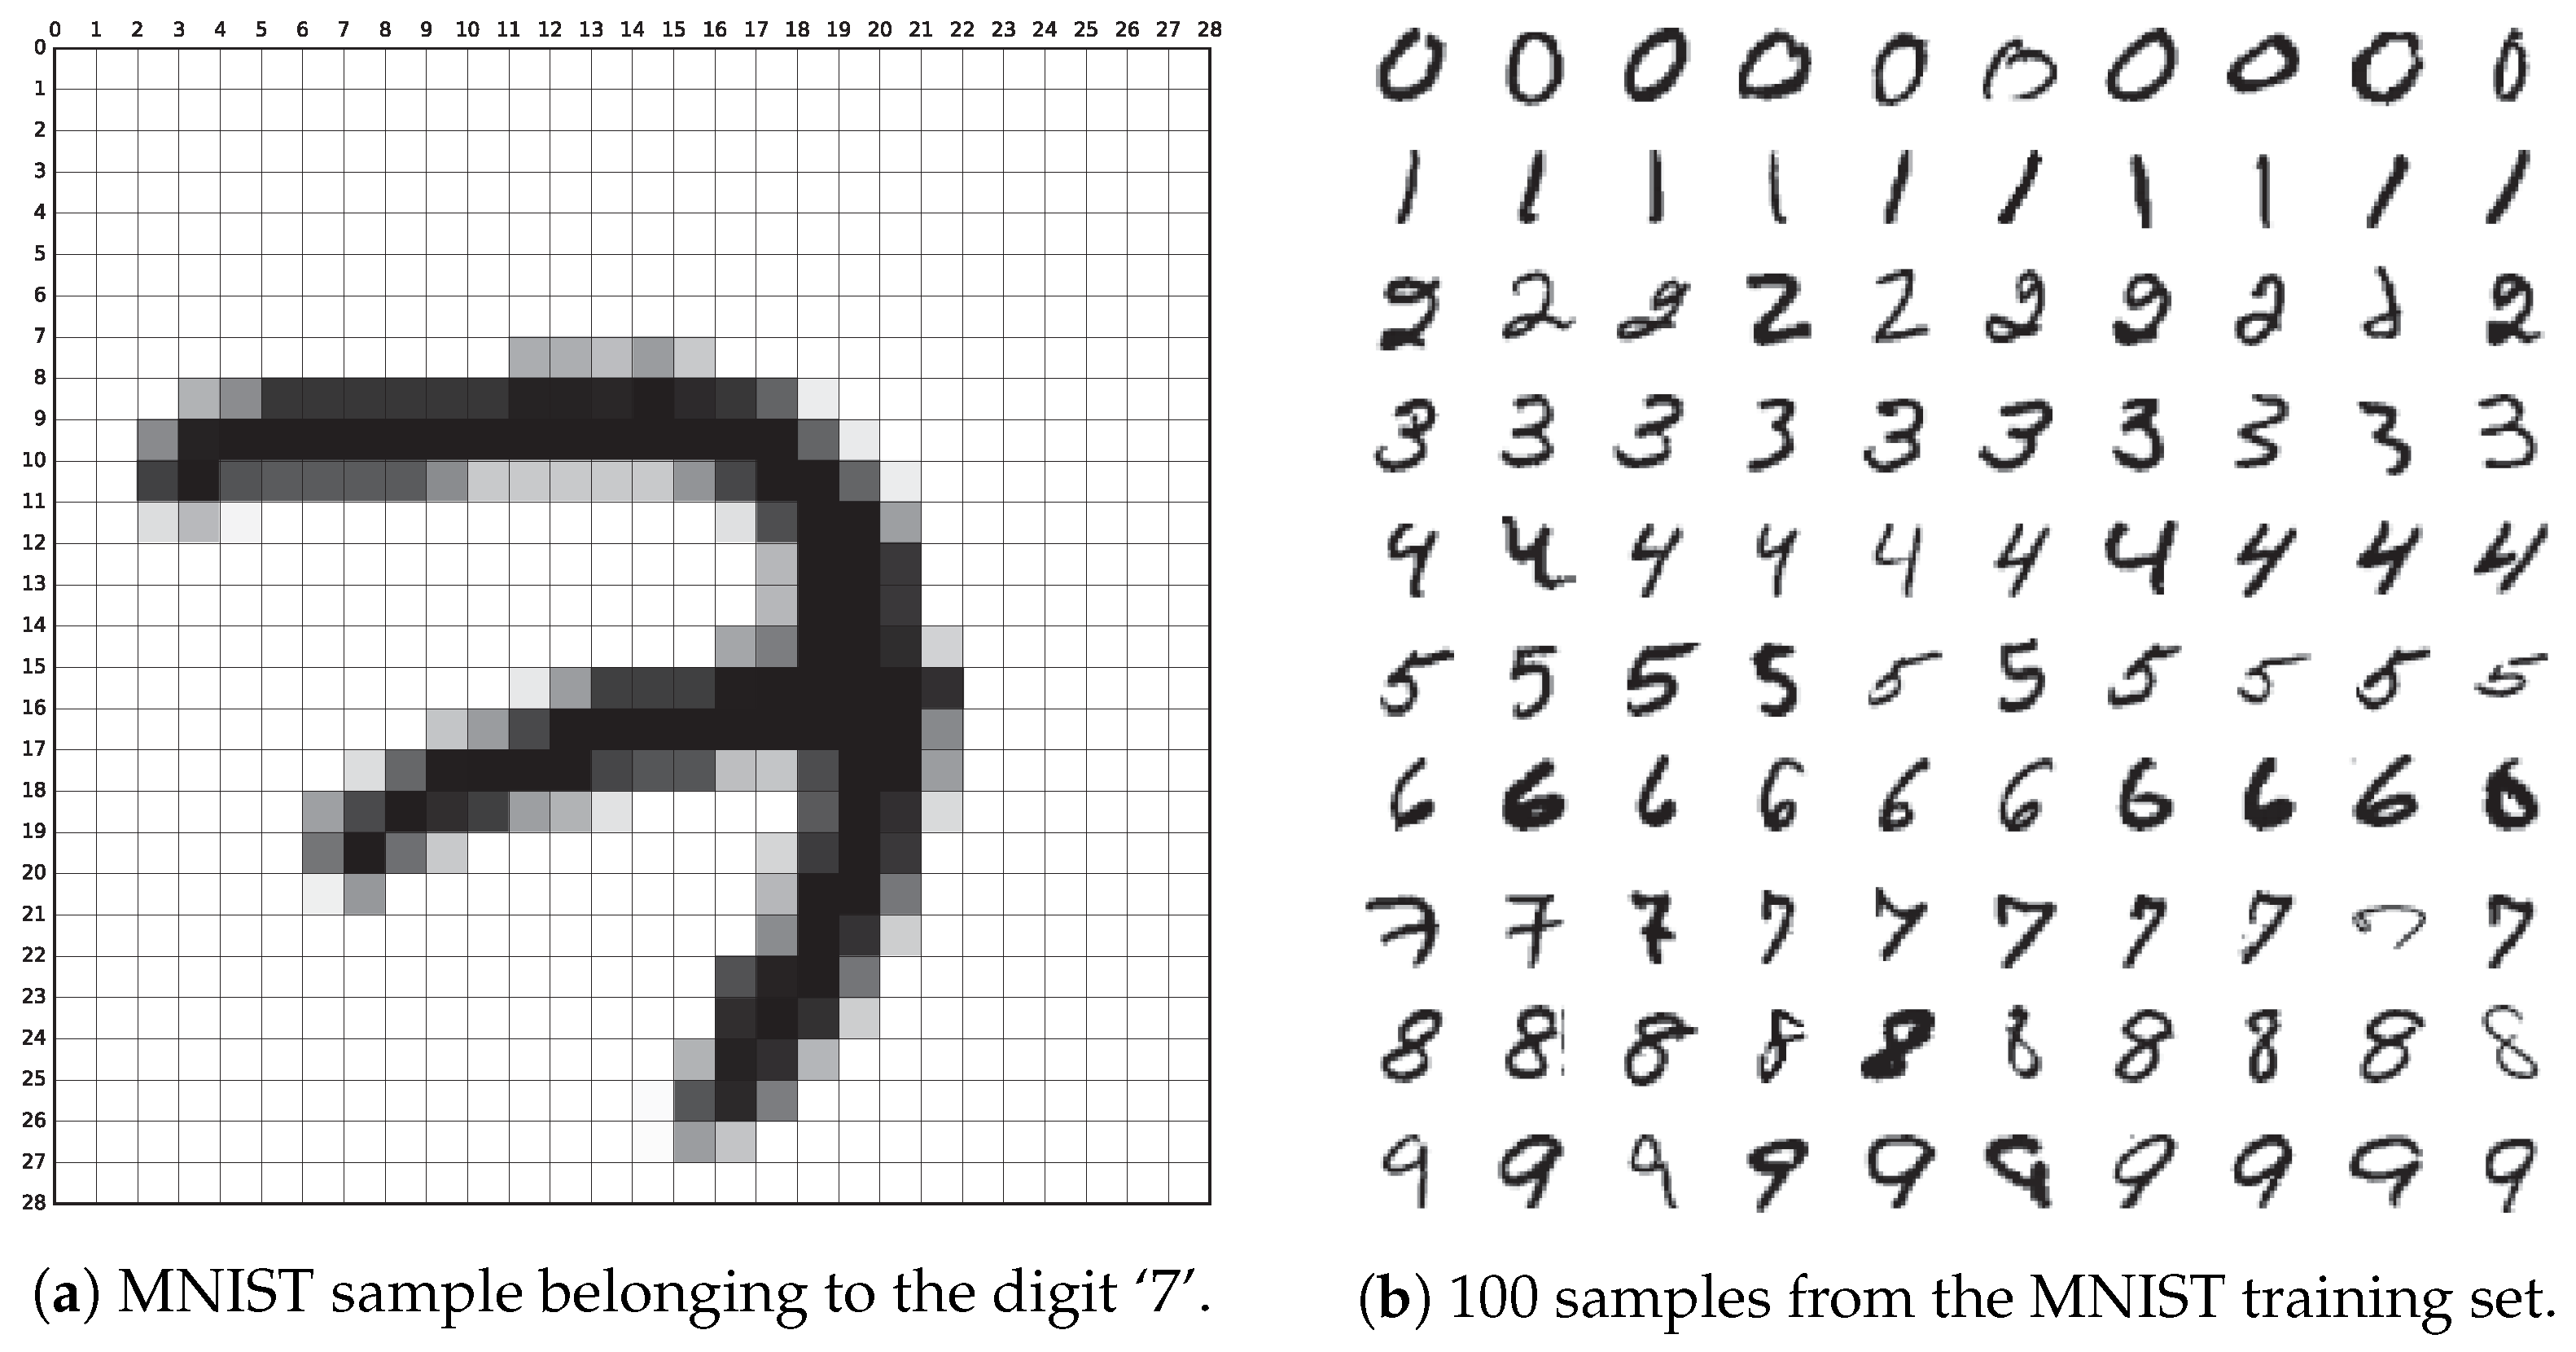

## Part 1: Training a Normal Neural Network (Multi-Layer Perceptron) on MNIST Dataset
In this section, we will walk through the process of training a Multi-Layer Perceptron (MLP), a type of artificial neural network, on the MNIST dataset for handwritten digit classification. We will discuss each step in detail to understand the methodology and rationale behind training an MLP for this specific task.

### Step 1: Import Necessary Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)


In [ ]:
first_image = train_images[0]
first_label = train_labels[0]

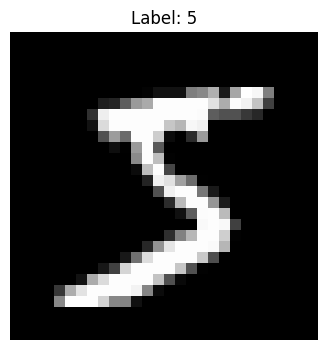

In [ ]:
plt.figure(figsize=(4, 4))  # Set figure size
plt.imshow(first_image, cmap='gray')  # Display the image using a grayscale colormap
plt.title(f"Label: {first_label}")  # Set the title of the plot
plt.axis('off')  # Turn off axis labels and ticks
plt.show()  # Display the plot

In [ ]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images to 1D arrays (28x28 = 784)
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Create a sequential model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.2911 - accuracy: 0.9182 - val_loss: 0.1515 - val_accuracy: 0.9560
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1231 - accuracy: 0.9639 - val_loss: 0.1113 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9764 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0817 - val_accuracy: 0.9761
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9872 - val_loss: 0.0819 - val_accuracy: 0.9753
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0328 - accuracy: 0.9908 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0787 - val_accuracy: 0.9780
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9812
Test Accuracy: 98.12%


## Part 2: Training a Convolutional Neural Network (CNN) on MNIST Dataset

### Step 1 : Importing Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize pixel values to range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Create a sequential model
model = Sequential()

# Add convolutional layers and max pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 6ms/step - loss: 0.2101 - accuracy: 0.9351 - val_loss: 0.0669 - val_accuracy: 0.9805
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9904
Test Accuracy: 99.04%


# Data Augmentation Code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded format
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Create data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compute quantities required for feature-wise normalization
datagen.fit(train_images)

In [ ]:
# Create a sequential model
model = Sequential()

# Add convolutional layers and max pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.6545 - accuracy: 0.3938 - val_loss: 1.3323 - val_accuracy: 0.5195
Epoch 2/10
1562/1562 [==============================] - 40s 25ms/step - loss: 1.4229 - accuracy: 0.4912 - val_loss: 1.1830 - val_accuracy: 0.5709
Epoch 3/10
1562/1562 [==============================] - 40s 25ms/step - loss: 1.3131 - accuracy: 0.5388 - val_loss: 1.1897 - val_accuracy: 0.5822
Epoch 4/10
1562/1562 [==============================] - 40s 26ms/step - loss: 1.2373 - accuracy: 0.5652 - val_loss: 1.0552 - val_accuracy: 0.6237
Epoch 5/10
1562/1562 [==============================] - 40s 25ms/step - loss: 1.1789 - accuracy: 0.5872 - val_loss: 1.0085 - val_accuracy: 0.6425
Epoch 6/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.1385 - accuracy: 0.6048 - val_loss: 0.9901 - val_accuracy: 0.6514
Epoch 7/10
1562/1562 [==============================] - 39s 25ms/step - loss: 1.1025 - accuracy: 0.6179 - val_loss: 0.9490 -

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.8498 - accuracy: 0.6978
Test Accuracy: 69.78%
